<a href="https://colab.research.google.com/github/rik2801/ML/blob/main/Rishi_Kiran_Munuswamy_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)
# HW 4

### Set up

In [21]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



### utility functions

In [22]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Synthetic dataset

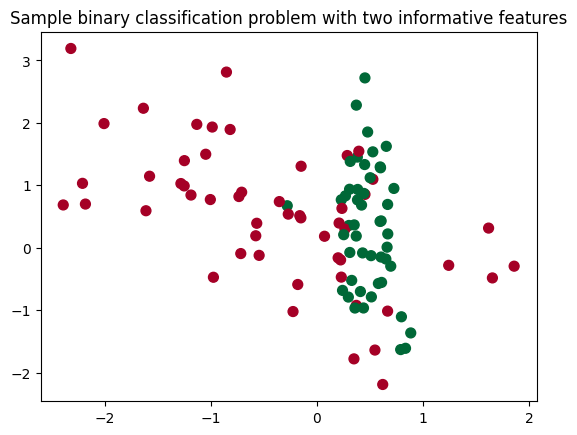

In [23]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Linear Support Vector Machine

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25



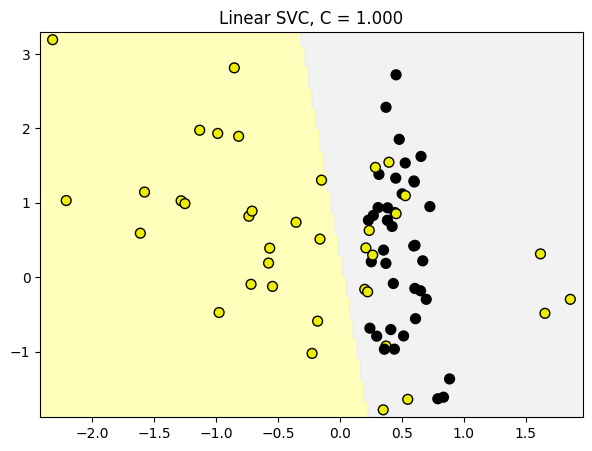

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print(result_metrics)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

title = 'Linear SVC, C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Linear Support Vector Machine: C parameter

- C is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



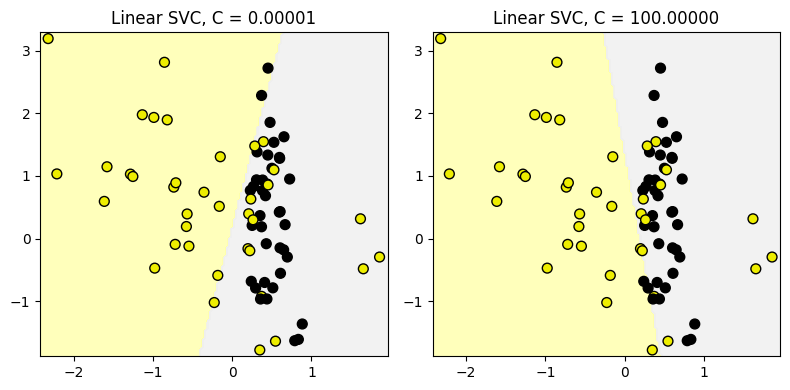

In [25]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
this_C = 1.0

fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C, max_iter=1000).fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred)
    print(result_metrics)

    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

### Kernelized Support Vector Machines

- More complex synthetic dataset

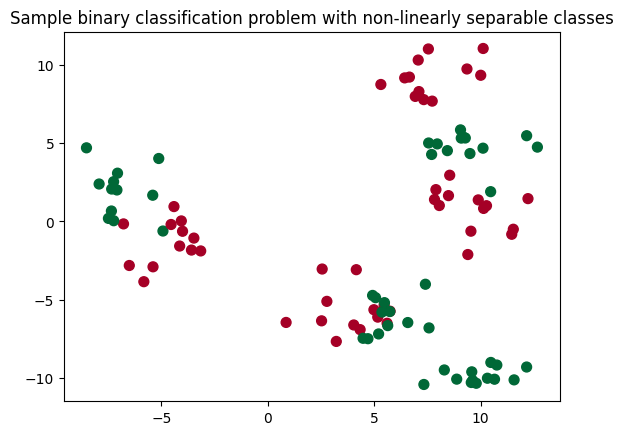

In [26]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Classification using kernels

#### RBF kernel (Gaussian kernel)
#### Polynomial kernel

RBF kernel (Gaussian) results
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      0.33      0.50        12

    accuracy                           0.68        25
   macro avg       0.81      0.67      0.63        25
weighted avg       0.80      0.68      0.64        25

Polynomial kernel results
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.83      0.42      0.56        12

    accuracy                           0.68        25
   macro avg       0.73      0.67      0.65        25
weighted avg       0.73      0.68      0.66        25



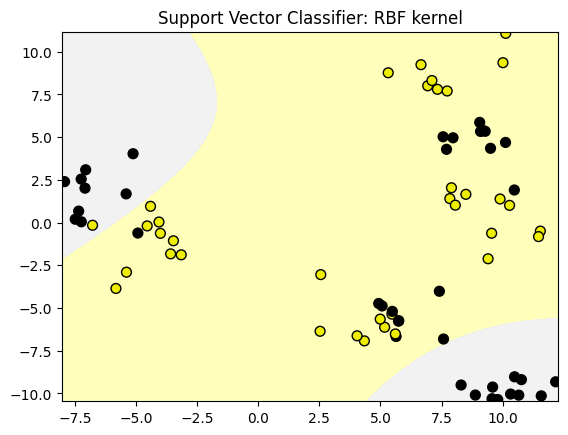

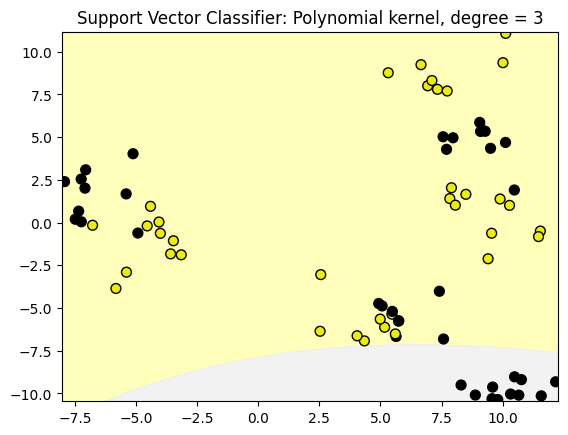

In [27]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf1 = SVC(max_iter=10000).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('RBF kernel (Gaussian) results\n', result_metrics)


clf2 = SVC(kernel='poly', max_iter=10000).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('Polynomial kernel results\n', result_metrics)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

### Support Vector Machine with RBF kernel: gamma parameter

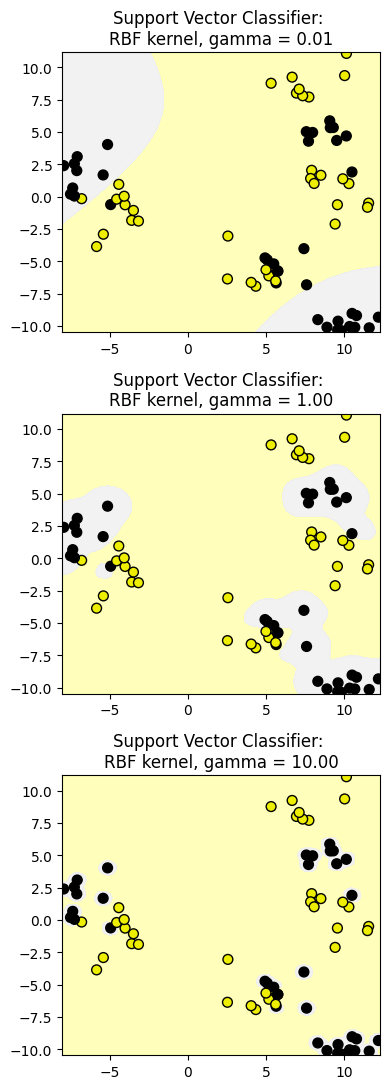

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)

    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

### Support Vector Machine with RBF kernel: using both C and gamma parameter

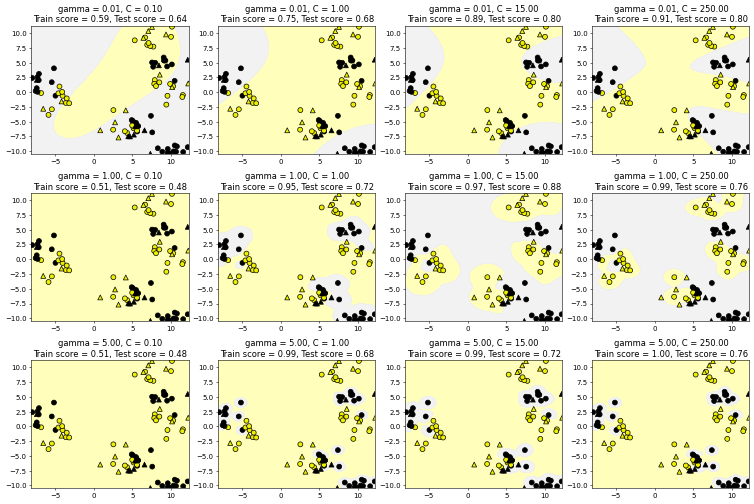

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):

    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# **HW 4**
----
# ***Rishi Kiran Munuswamy***
###Part 1:

#### Breast cancer dataset for classification:

- Apply SVM linear kernel (basically no kernel) and print the performance metrics.

- Apply SVM RBF kernel (Gaussian kernel) and print the performance metrics with non-normalized dataset.

- Apply SVM RBF kernel with normalized dataset.

- Apply SVM RBF kernel using varying C and gamma parameter values. Use C= 0.1, 1, 15, 250.  Use gamma= 0.01, 1, 5.  Hence, 12 subplots,  similar to the above example, should be drawn.

### Part 2:

- Write a short comparisons of SVM linear kernel and RBF kernel.

- Write a short summary of how C and gamma parameters play in SVM RBF kernel.



# **Part 1**
---

### **Download breast cancer dataset**



In [59]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from mlxtend.plotting import plot_decision_regions

### **Load dataset**

In [61]:

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

### **Split into training and testing sets**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **SVM Linear Kernel**

In [72]:
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train, y_train)
y_pred_linear = linear_svc.predict(X_test)
print("Linear Kernel SVM - Classification Report:")
print(classification_report(y_test, y_pred_linear))

Linear Kernel SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



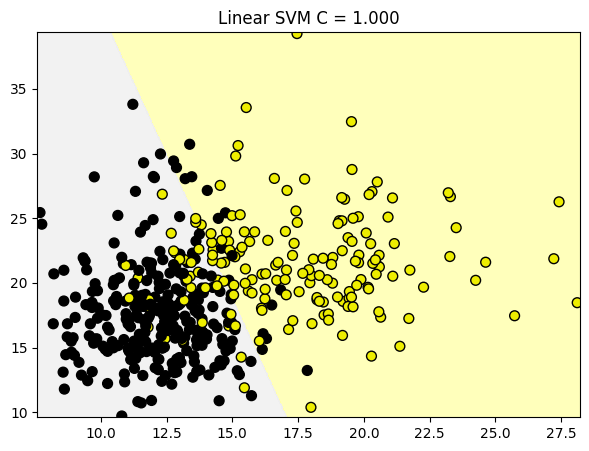

In [73]:
fig, ax = plt.subplots(figsize=(7, 5))

plot_title = f'Linear SVM C = {1.0:.3f}'
plot_class_regions_for_classifier_subplot(
    SVC(kernel='linear', C=1.0).fit(X_train[:, :2], y_train),
    X_train[:, :2], y_train, None, None, plot_title, ax
)

plt.show()


### **SVM with RBF Kernel (Without Normalization)**

In [65]:
rbf_svc = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)
print("RBF Kernel SVM (Non-Normalized) - Classification Report:")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel SVM (Non-Normalized) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



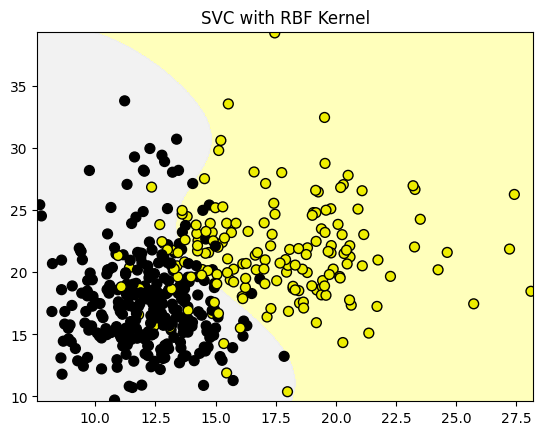

In [66]:
plot_class_regions_for_classifier(
    SVC(max_iter=10000).fit(X_train[:, :2], y_train),
    X_train[:, :2], y_train,
    None, None,
    'SVC with RBF Kernel'
)

### **SVM with RBF Kernel (With Normalized Data)**

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rbf_svc_scaled = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svc_scaled.fit(X_train_scaled, y_train)
y_pred_rbf_scaled = rbf_svc_scaled.predict(X_test_scaled)
print("RBF Kernel SVM (Normalized) - Classification Report:")
print(classification_report(y_test, y_pred_rbf_scaled))

RBF Kernel SVM (Normalized) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



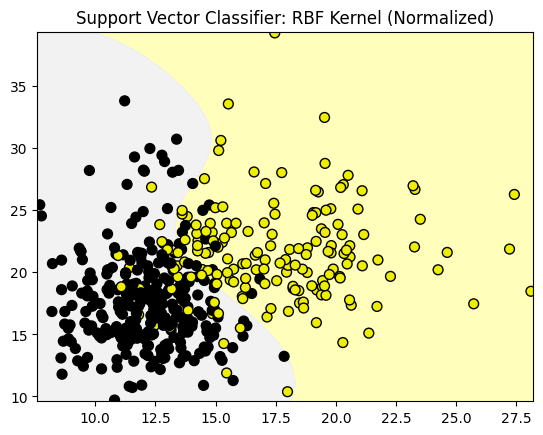

In [75]:
plot_class_regions_for_classifier(
    SVC(kernel='rbf', max_iter=10000).fit(X_train[:, :2], y_train),
    X_train[:, :2], y_train, None, None,
    'Support Vector Classifier: RBF Kernel (Normalized)'
)

### **Impact of Normalization on RBF Kernel Performance:**
The performance stability of RBF kernel remained intact when the data normalization occurred achieving a 97% accuracy rate. Under these conditions feature scaling proved to have minimal influence on the classification accuracy achieved by the RBF kernel.

The consistent performance is due to three reasons:

- The dataset features distribution was naturally optimal for SVM classification prior to the experiment.

- Data mapping by RBF kernel into elevated dimensions leads to class separability that becomes independent of feature scaling.

- The optimal balance between the C and gamma values could diminish the effects of normalization because they are already properly adjusted.

The dataset demonstrates strong robustness in classification abilities despite the fact that normalization practices sustain their value as an important best practice for generalization needs in real-world scenarios.


###  **Experimenting with C and Gamma in RBF Kernel**

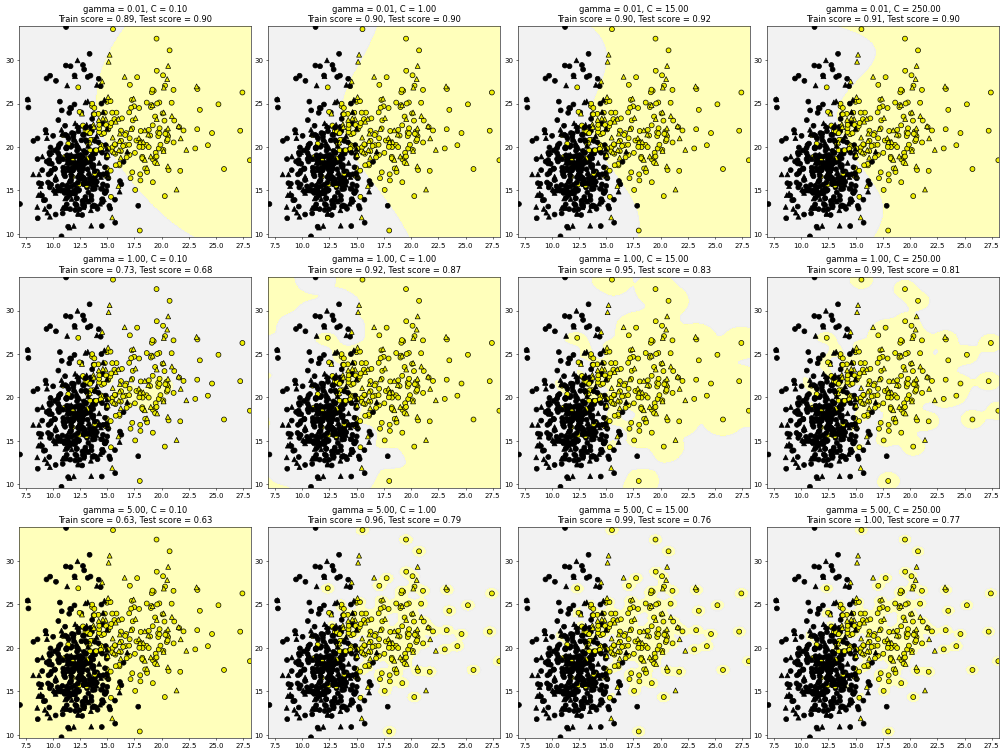

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

fig, axes = plt.subplots(3, 4, figsize=(20, 15), dpi=50)

for gamma_value, row_axes in zip([0.01, 1, 5], axes):
    for C_value, ax in zip([0.1, 1, 15, 250], row_axes):
        model_title = f'gamma = {gamma_value:.2f}, C = {C_value:.2f}'

        classifier = SVC(kernel='rbf', gamma=gamma_value, C=C_value).fit(X_train, y_train)

        plot_class_regions_for_classifier_subplot(
            SVC(kernel='rbf', gamma=gamma_value, C=C_value).fit(X_train[:, :2], y_train),
            X_train[:, :2], y_train, X_test[:, :2], y_test,
            model_title, ax
        )

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


Top Row (Low Gamma = 0.01):
At low values of gamma the boundary keeps a wide shape which exhibits minimal response to different points in the data.
When C increases from left to right between 0.1 to 250 the boundary structure only shows minimal changes while accuracy levels rise steadily.
The model achieves good generalization and decreased overfitting and produces smooth decision regions thanks to a low gamma value.

Middle Row (Moderate Gamma = 1):
The data distribution adjustment capabilities increase for the model through a moderate gamma value setting.
The model becomes sensitivity to misclassifications while having an increased overfitting risk at C=250 as C values rise.
The middle part demonstrates how generalization performance finds equilibrium with decision boundary complexity.

Bottom Row (High Gamma = 5):
When using high gamma the model generates compact and curved boundary lines which wrap around data points.
The strictness of decision regions depends on C value magnitude because lower C values establish broader margins but higher C values construct narrow margins which improve detail fitting at the cost of increased probability of overfitting.
The system shows excellent fit to training data yet shows low capacity to handle novel input data.

# **PART 2**
---

### **Linear vs. RBF Kernel: Performance Comparison**



**Linear Kernel:**
The linear SVM depends on a straight-line decision boundary which optimizes results in datasets that have clear linear separability. The model obtains an accuracy rate of 96% which confirms that a basic hyperplane produces sufficient classification results. The simple approach runs efficiently while providing easy interpretation although it demonstrates limited capability when processing difficult patterns.

**RBF Kernel:**
Non-linear patterns become detectable when the RBF kernel transforms data points to locations in an elevated dimensional space. The model creates curved decision boundaries through this process which generates an accuracy level of 97%. RBF Kernel provides enhanced flexibility that addresses complex patterns found in the database structures.

**Conclusion:**
The RBF kernel achieves a slightly better accuracy rate than linear kernels since it accurately handles complex non-linear data patterns. As a strong alternative the linear kernel provides good performance when simpler decision boundaries are adequate since it offers quick processing and clear interpretability.



### **Summary**

SVM RBF kernel uses two parameters C and gamma which control decision boundary structure while influencing model complexity together with generalization capability. Parameter tuning determines how well models perform on new prediction data or tend to learn from the training set estimations.

The C parameter functions as a regularizer that enables users to manage the relationship between maximum margin value and error reductions. Using a lower C value enables the model to maintain large gaps between output labels which maximizes generalization quality beyond accuracy levels and decreases point-by-point sensitivity. A higher robustness to noise exists in this model structure although it might result in underfitting that fails to detect essential patterns. The performance of an SVM model becomes very sensitive to error detection when C takes high values because the model becomes compelled to closely match training dataset points. The improved accuracy on the training records comes at a cost of reduced generalization which leads to an increased risk of overfitting during new data applications.

The decision boundary depends on the values of each training sample through the gamma parameter. The wide application range of each data point produced by a low gamma value creates broad decision regions that generate smooth decision boundaries. When averaged across the global range the model becomes less sensitive to small changes in localized areas. Using a higher gamma setting makes the model sensitive to every training point thus producing a boundary that adapts to each point. The improved fit to training data as a result of hyperparameter adjustment may lead the model to fail in generalizing beyond its training information.
Deciding appropriate values for C and gamma forms an essential part of any modeling process. The decision boundary becomes overfitting when C and gamma values are set high and underfitting occurs when these values are set low.

# **PART 3:  Reflection and Difficulties**
---


#### **Reflection**  
Working with Support Vector Machines (SVM) for breast cancer classification proved educational for developing expertise in kernel selection as well as understanding hyperparameter optimization along with decision boundary display. The linear kernel created an understandable decision boundary that led to a high accuracy rate of 96% because the dataset had some linearly separable features. The RBF kernel demonstrated increased flexibility to detect non-linear relationships by transforming data through a higher-dimensional space which allowed a slight improvement to reach accuracy at 97%.  

The alterations of RBF model parameters through C and gamma value modification demonstrated their effect on decision boundary complexity. The decision boundary had smoother shapes when gamma was set to a low value yet higher gamma values produced more complex boundaries which often caused overfitting. Increasing C values in the model design made it more liable to training errors which resulted in higher adaptability to deal with misclassified data points.  

The model accuracy remained unchanged after normalization because the existing distribution of data points in the dataset allowed effective classification. The implementation of normalization as a best practice ensures consistency and stability during SVM applications to different datasets.  

---


#### **Difficulties Encountered**  
A major struggle existed in adjusting the hyperparameter values to establish ideal model dimensions between weak points and overall explanations. Multiple iterations which ran at a high computational cost were required to identify the proper C and gamma values. Deciding decision boundary values became challenging because the dataset contained multiple high-dimensional features. The transformation to 2D using PCA proved beneficial but this process unavoidably discarded parts of the original data set information.  

The preprocessing step focused on addressing both class imbalance and ensuring identical results between training and testing data sets. Through this assignment we reinforced how vital it is to perform feature scaling and select proper kernels and set appropriate hyperparameters for developing an effective SVM model for realistic classification scenarios.